In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from IPython.display import Math, display
########### LATEX Style Display Matrix ###############
def display_matrix(array):
    """Display given numpy array with Latex format in Jupyter Notebook.
    Args:
        array (numpy array): Array to be displayed
    """
    data = ""
    for line in array:
        if len(line) == 1:
            data += " %.3f &" % line + r" \\\n"
            continue
        for element in line:
            data += " %.3f &" % element
        data += r" \\" + "\n"
    display(Math("\\begin{bmatrix} \n%s\\end{bmatrix}" % data))

In [2]:
r=4
N=10000

In [3]:
lambd=float(0.9999)

In [4]:
D=lambd**(1.0*np.arange(N))

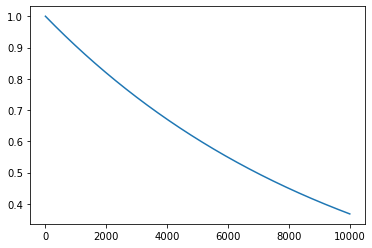

In [5]:
plt.plot(D)

In [7]:
H=np.random.rand(r,N)
RH=H@H.T/N
BH = np.linalg.inv(RH)

display_matrix(BH)

<IPython.core.display.Math object>

In [50]:
B = BH
B = np.eye(r)
lambd = 0.999 
gam=(1-lambd)/lambd
for k in range(10000):
    h = H[:,k]
    z= B @ h
    B_update = np.outer(z, z)
    B = (1 / lambd) * (B - gam * B_update)

In [51]:
B / BH

array([[1.02173038, 1.02551994, 1.09333009, 0.96205711],
       [1.02551994, 0.97901107, 0.82370064, 1.10466634],
       [1.09333009, 0.82370064, 0.97360581, 0.98274164],
       [0.96205711, 1.10466634, 0.98274164, 1.01806452]])

In [119]:
H=np.random.rand(r,N)
RH=H@np.diag(D)@H.T*(1-lambd)

In [120]:
RH

array([[0.21028091, 0.15817488, 0.15802188, 0.15841528],
       [0.15817488, 0.21118517, 0.15829724, 0.15808247],
       [0.15802188, 0.15829724, 0.21295493, 0.15827601],
       [0.15841528, 0.15808247, 0.15827601, 0.21111535]])

In [205]:
RH=H@H.T/N

In [206]:
np.linalg.inv(RH)

array([[ 9.25170253, -2.76044729, -2.68618602, -2.85591277],
       [-2.76044729,  9.16664377, -2.71846851, -2.75751428],
       [-2.68618602, -2.71846851,  8.99124426, -2.68922162],
       [-2.85591277, -2.75751428, -2.68922162,  9.22006253]])

In [207]:
B=np.linalg.inv(H@H.T/N)#np.linalg.inv(RH)

In [208]:
gam=(1-lambd)/lambd
gam

0.000100010001000089

In [15]:
for k in range(100):
  h=H[:,N-k-1]
  z=B@h
  B=1/lambd*(B-1/(1/gam+z.T@h)*z@z.T)

In [16]:
z @ z.T

0.9123656161176891

In [212]:
B

array([[ 8.71515885, -3.53966475, -3.46390322, -3.63705885],
       [-3.53966475,  8.62838171, -3.49683789, -3.53667248],
       [-3.46390322, -3.49683789,  8.44943871, -3.46700015],
       [-3.63705885, -3.53667248, -3.46700015,  8.68287966]])

In [112]:
np.linalg.pinv(H@H.T/N)

array([[ 9.34856025, -2.89279308, -2.68813321, -2.9146026 ],
       [-2.89279308,  9.16855251, -2.62698253, -2.68994685],
       [-2.68813321, -2.62698253,  9.22678604, -2.91837489],
       [-2.9146026 , -2.68994685, -2.91837489,  9.39344454]])

In [38]:
(1-lambd)/lambd

0.0010010010010010019